In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/탑.csv')
df.drop('Unnamed: 0',1,inplace=True)
df.head(2)

C:\Users\ice_9\AppData\Local\Temp\ipykernel_16624\1127556143.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('Unnamed: 0',1,inplace=True)


,win,킬수,어시,데스,챔피언에게 가한 피해량,받은 피해량,얻은 골드,cs 수,포탑 골드 획득 갯수,퍼블유무,퍼블어시유무,연속 킬,시야점수,핑와산갯수,와드제거수,설치와드수,게임시간 대비 cc기 건 시간,게임시간 대비 죽은 시간
0,True,15,3,6,23814,28984,14062,132,4,False,False,7,10,0,0,7,0.02,0.09
1,False,1,1,12,10341,21958,9156,129,0,False,False,0,4,0,1,1,0.01,0.20


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(df.drop('win',1),df['win'], random_state=0)

scaler = MinMaxScaler()
scaler.fit(X_train)  #train꺼로 transform한걸로 fit 중요!!!!
X_train_temp = scaler.transform(X_train)
X_test_temp = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_temp, columns=X_train.columns, index=list(X_train.index.values))
X_test = pd.DataFrame(X_test_temp, columns=X_test.columns, index=list(X_test.index.values))

C:\Users\ice_9\AppData\Local\Temp\ipykernel_16624\2179540545.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(df.drop('win',1),df['win'], random_state=0)


1.0 0.777
0.889 0.778
0.893 0.811
0.871 0.812
0.874 0.824
0.865 0.822
0.867 0.827
0.861 0.827
0.862 0.83
0.893 0.811


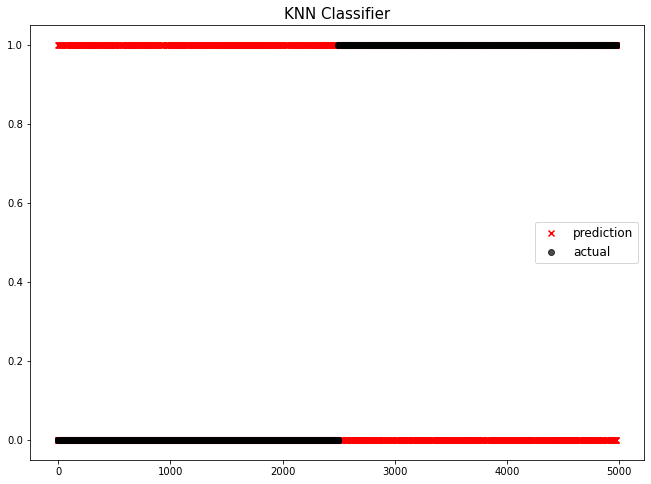

            model        f1
0  KNN Classifier  0.810463


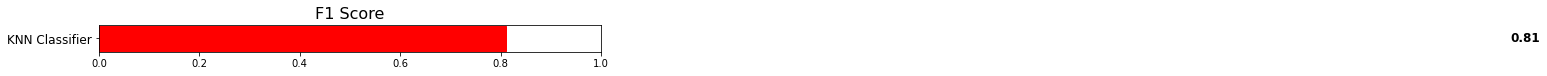

In [4]:
### 모델링 (random_state=0)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def f1_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#### knn 파라미터 찾기
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    print(knn.score(X_train, y_train).round(3), knn.score(X_test, y_test).round(3))
    # f1_eval(f'KNN Classifier {i}', pred, y_test)
#### 머신러닝 모델 돌려보기
#### hyperparameter 튜닝 전
# KNN classifier (K=3)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(knn.score(X_train, y_train).round(3), knn.score(X_test, y_test).round(3))
f1_eval('KNN Classifier', pred, y_test)

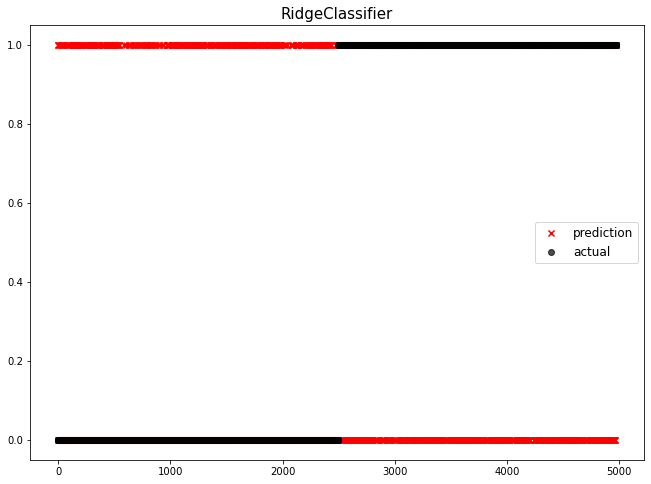

             model        f1
0  RidgeClassifier  0.835128
1   KNN Classifier  0.810463


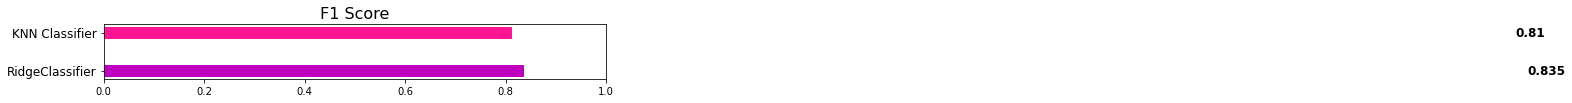

In [5]:
# RidgeCalssifier (alpha=1)
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier(alpha=1)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
f1_eval('RidgeClassifier', pred, y_test)

0.845 0.85


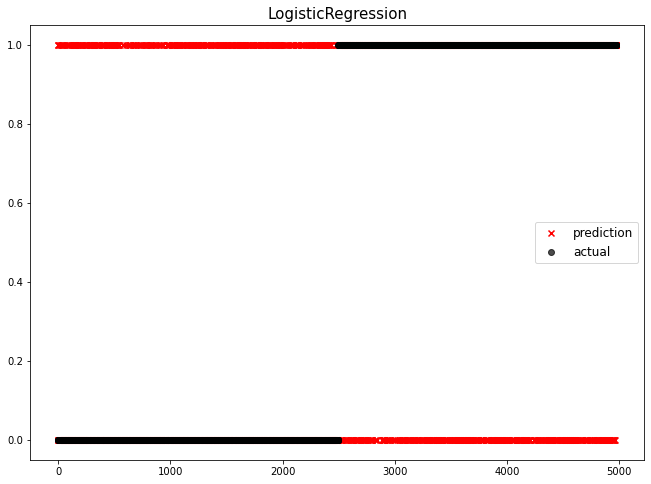

                model        f1
0  LogisticRegression  0.848682
1     RidgeClassifier  0.835128
2      KNN Classifier  0.810463


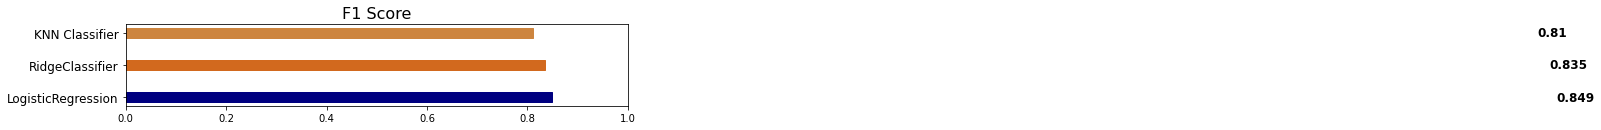

In [6]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state=0)
lg.fit(X_train, y_train)
pred = lg.predict(X_test)
print(lg.score(X_train, y_train).round(3), lg.score(X_test, y_test).round(3))
f1_eval('LogisticRegression', pred, y_test)

0.822 0.822


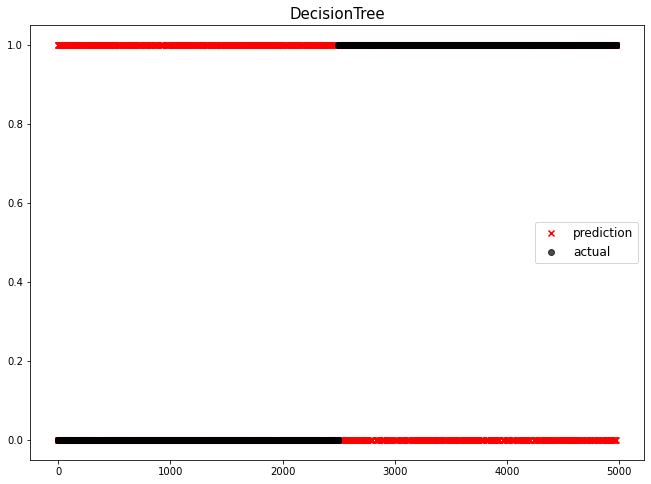

                model        f1
0  LogisticRegression  0.848682
1     RidgeClassifier  0.835128
2        DecisionTree  0.825616
3      KNN Classifier  0.810463


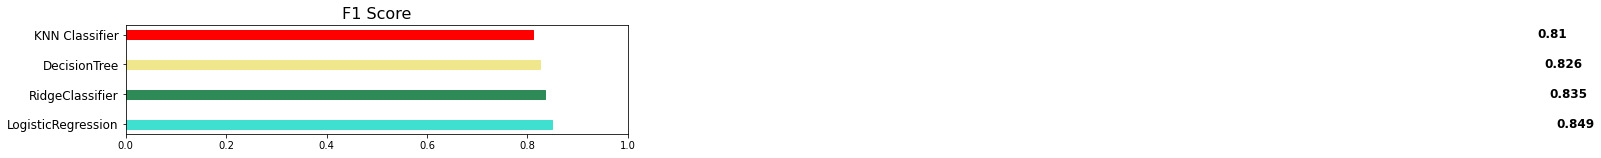

In [7]:
# DecisionTree (max_depth = 5, max_features=0.8)
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0,max_depth = 5, max_features=0.8)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
print(tree.score(X_train, y_train).round(3), tree.score(X_test, y_test).round(3))
f1_eval('DecisionTree', pred, y_test)

0.83 0.827


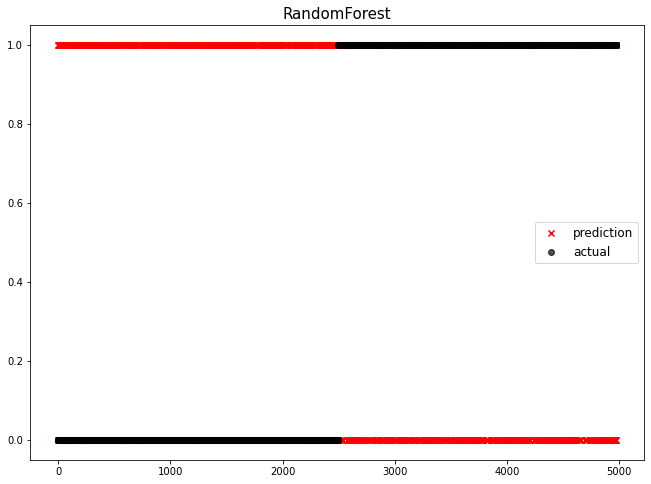

                model        f1
0  LogisticRegression  0.848682
1     RidgeClassifier  0.835128
2        RandomForest  0.830872
3        DecisionTree  0.825616
4      KNN Classifier  0.810463


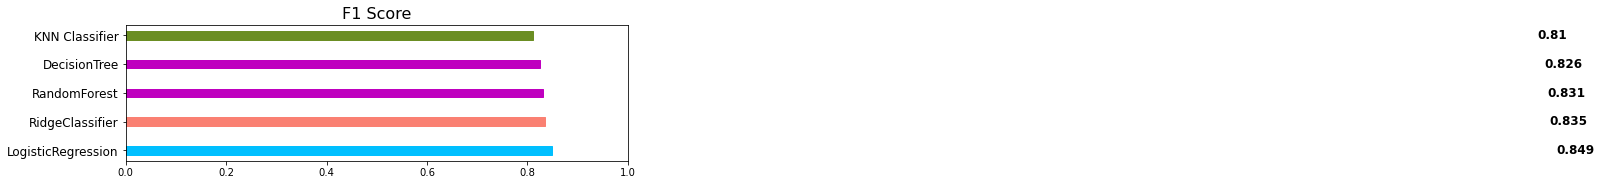

In [8]:
#RF (max_depth = 5)
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 0, max_depth = 5)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
print(forest.score(X_train, y_train).round(3), forest.score(X_test, y_test).round(3))
f1_eval('RandomForest', pred, y_test)

0.95 0.842


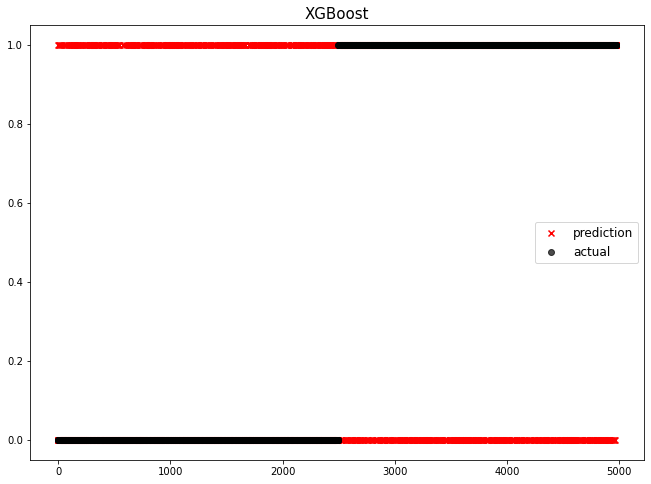

                model        f1
0  LogisticRegression  0.848682
1             XGBoost  0.842380
2     RidgeClassifier  0.835128
3        RandomForest  0.830872
4        DecisionTree  0.825616
5      KNN Classifier  0.810463


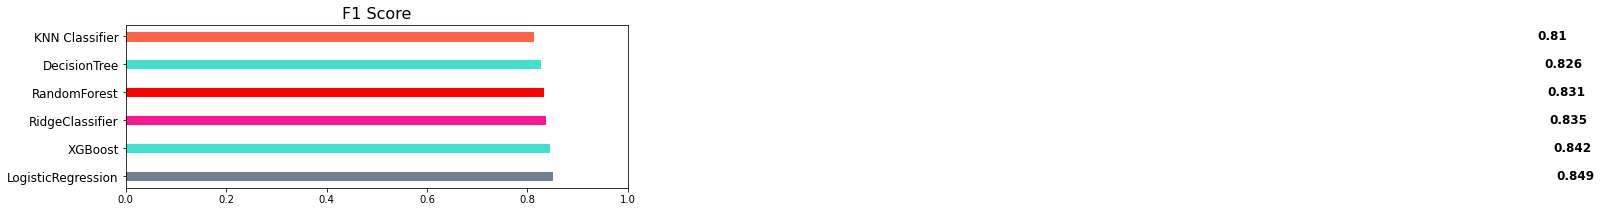

In [9]:
# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 0)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(xgb.score(X_train, y_train).round(3), xgb.score(X_test, y_test).round(3))
f1_eval('XGBoost', pred, y_test)

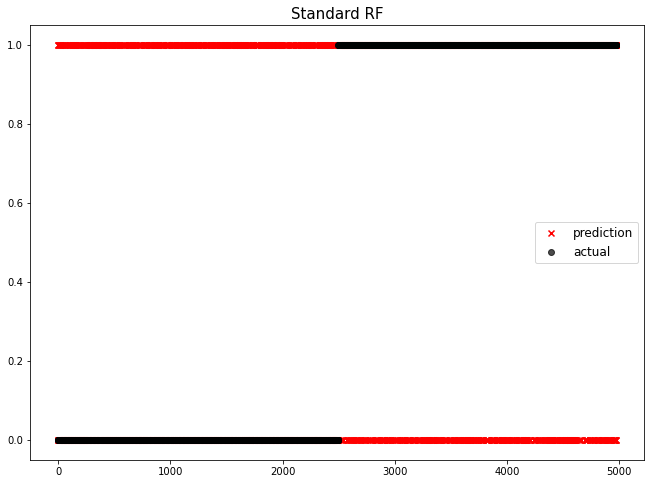

                model        f1
0  LogisticRegression  0.848682
1             XGBoost  0.842380
2     RidgeClassifier  0.835128
3        RandomForest  0.830872
4         Standard RF  0.830872
5        DecisionTree  0.825616
6      KNN Classifier  0.810463


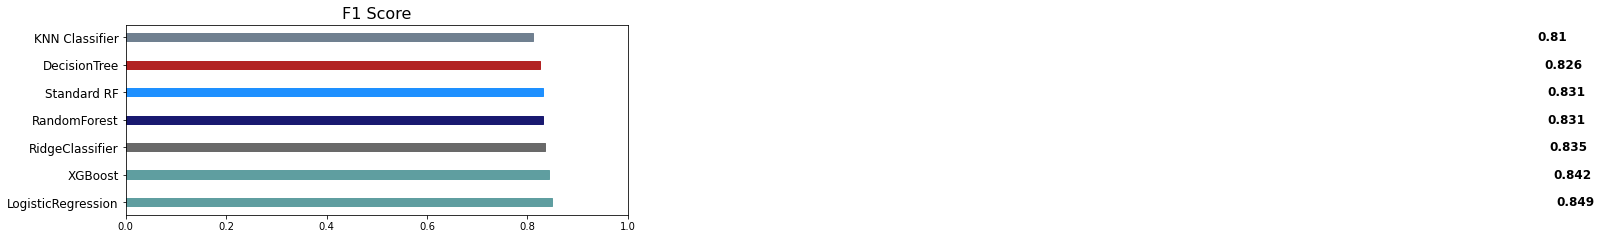

In [10]:
RF_pipeline = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state = 0, max_depth = 5)
)
RF_pipeline.fit(X_train, y_train)
pred = RF_pipeline.predict(X_test)
f1_eval('Standard RF', pred, y_test)

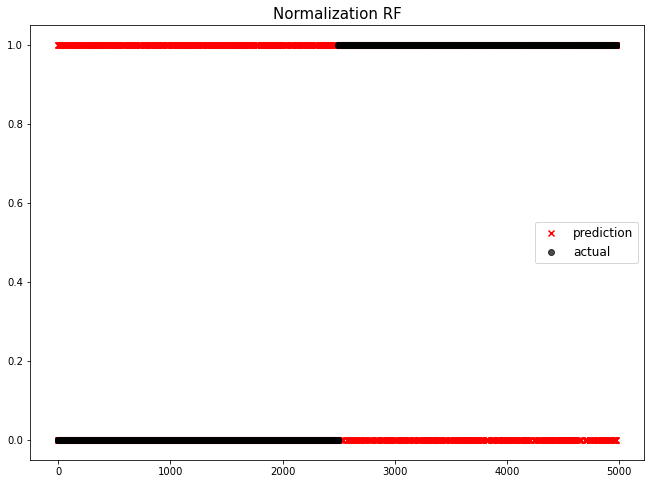

                model        f1
0  LogisticRegression  0.848682
1             XGBoost  0.842380
2     RidgeClassifier  0.835128
3        RandomForest  0.830872
4         Standard RF  0.830872
5    Normalization RF  0.830872
6        DecisionTree  0.825616
7      KNN Classifier  0.810463


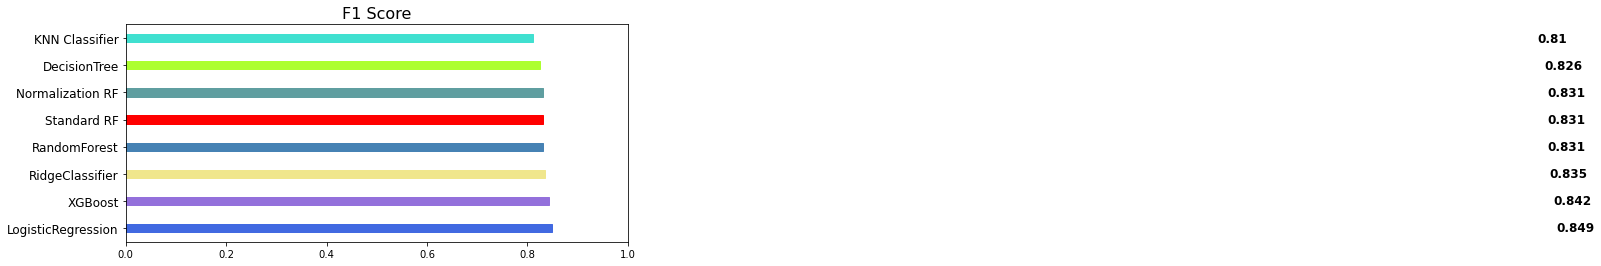

In [11]:
RF_pipeline = make_pipeline(
    MinMaxScaler(),
    RandomForestClassifier(random_state = 0, max_depth = 5)
)
RF_pipeline.fit(X_train, y_train)
pred = RF_pipeline.predict(X_test)
f1_eval('Normalization RF', pred, y_test)

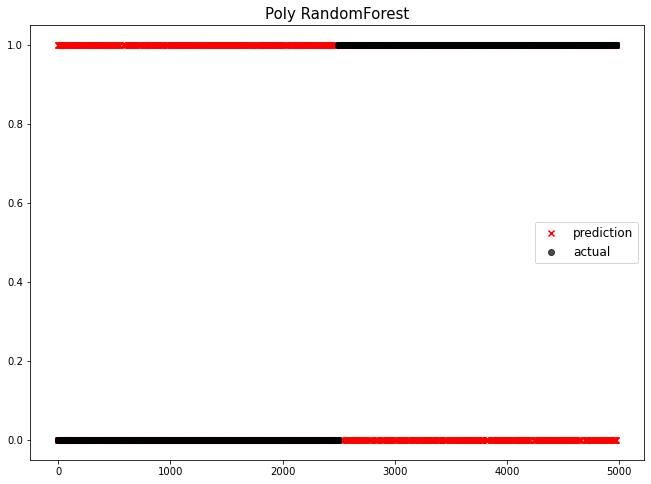

                model        f1
0  LogisticRegression  0.848682
1             XGBoost  0.842380
2     RidgeClassifier  0.835128
3        RandomForest  0.830872
4         Standard RF  0.830872
5    Normalization RF  0.830872
6   Poly RandomForest  0.825812
7        DecisionTree  0.825616
8      KNN Classifier  0.810463


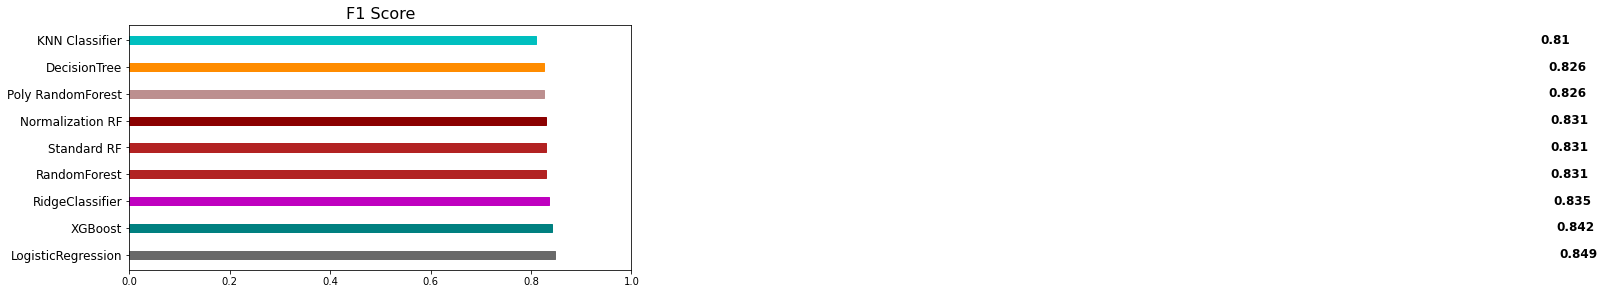

In [12]:
poly_RF_pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    RandomForestClassifier(random_state = 0, max_depth = 5)
)
poly_RF_pipeline.fit(X_train, y_train)
poly_pred = poly_RF_pipeline.predict(X_test)
f1_eval('Poly RandomForest', poly_pred, y_test)

In [13]:
from sklearn.ensemble import VotingClassifier

models = [
    ('Logi', LogisticRegression()), 
    # ('ridge', RidgeClassifier()),
    # ('knn', KNeighborsClassifier()),
    # ('tree', DecisionTreeClassifier()),
    ('ranfore', RandomForestClassifier()),
    ('xgb', XGBClassifier())
]

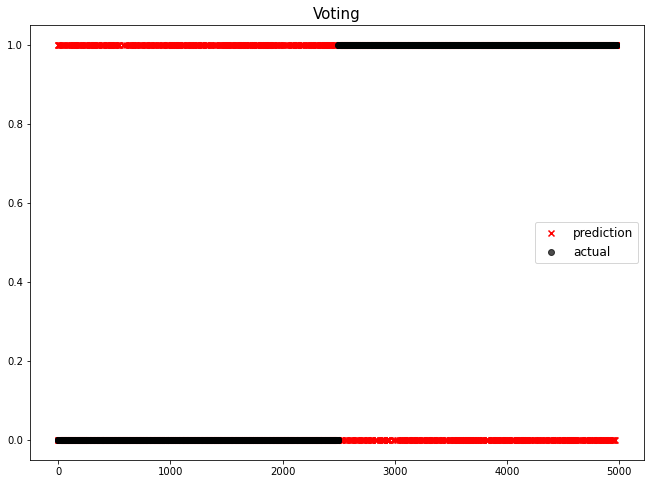

                model        f1
0  LogisticRegression  0.848682
1              Voting  0.847900
2             XGBoost  0.842380
3     RidgeClassifier  0.835128
4        RandomForest  0.830872
5         Standard RF  0.830872
6    Normalization RF  0.830872
7   Poly RandomForest  0.825812
8        DecisionTree  0.825616
9      KNN Classifier  0.810463


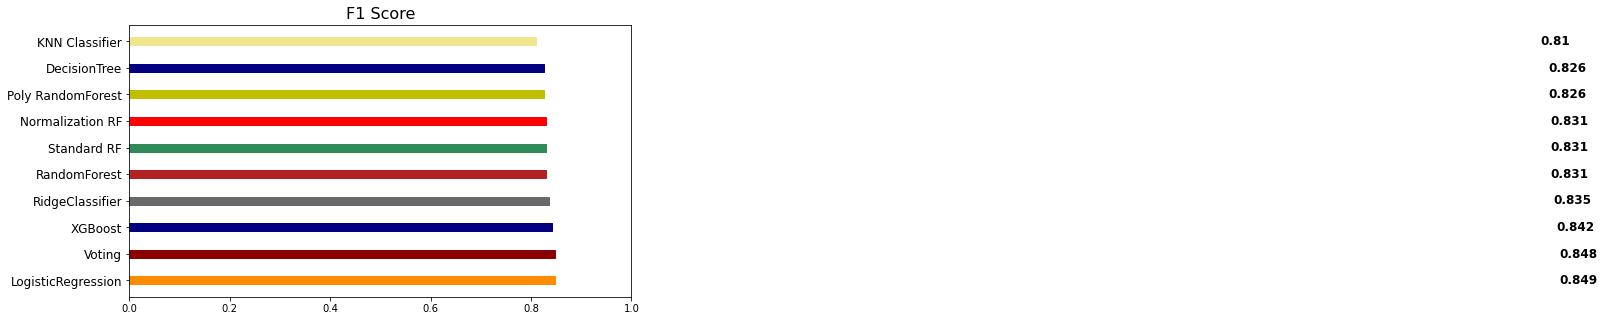

In [14]:
vc = VotingClassifier(models, voting='soft', n_jobs=-1)
vc.fit(X_train, y_train)
pred = vc.predict(X_test)
f1_eval('Voting', pred, y_test)

In [15]:
models = [
    ('Logi', LogisticRegression()), 
    # ('ridge', RidgeClassifier()),
    # ('knn', KNeighborsClassifier()),
    # ('tree', DecisionTreeClassifier()),
    ('ranfore', RF_pipeline),
    ('xgb', XGBClassifier())
]

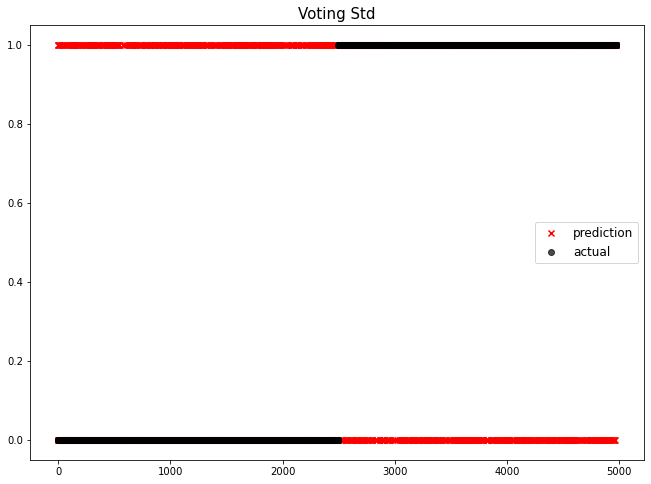

                 model        f1
0   LogisticRegression  0.848682
1               Voting  0.847900
2           Voting Std  0.847560
3              XGBoost  0.842380
4      RidgeClassifier  0.835128
5         RandomForest  0.830872
6          Standard RF  0.830872
7     Normalization RF  0.830872
8    Poly RandomForest  0.825812
9         DecisionTree  0.825616
10      KNN Classifier  0.810463


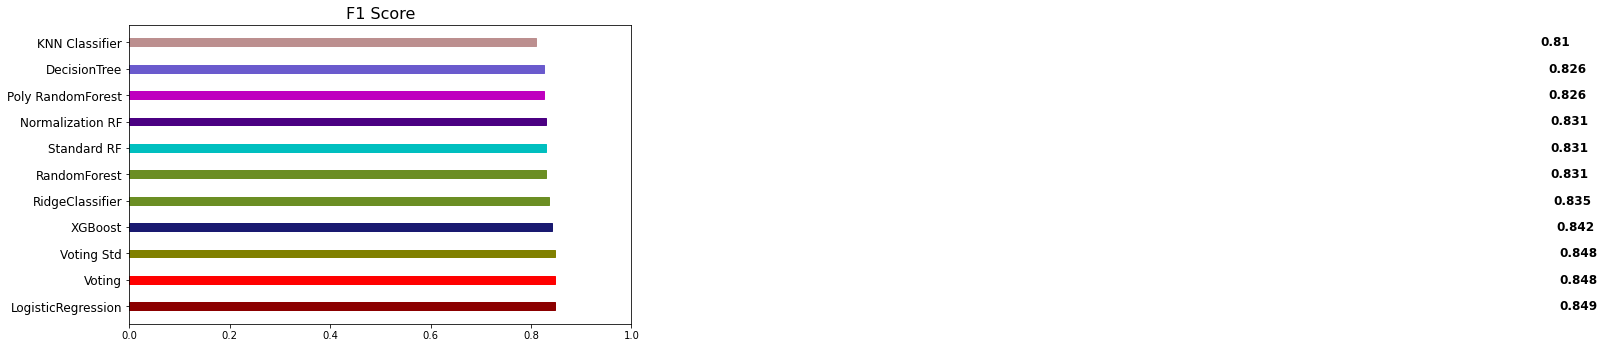

In [16]:
vc = VotingClassifier(models, voting='soft', n_jobs=-1)
vc.fit(X_train, y_train)
pred = vc.predict(X_test)
f1_eval('Voting Std', pred, y_test)

In [17]:
from sklearn.ensemble import StackingClassifier

stack_models = [
    ('randomforest', forest), 
    ('logistic', lg),
]

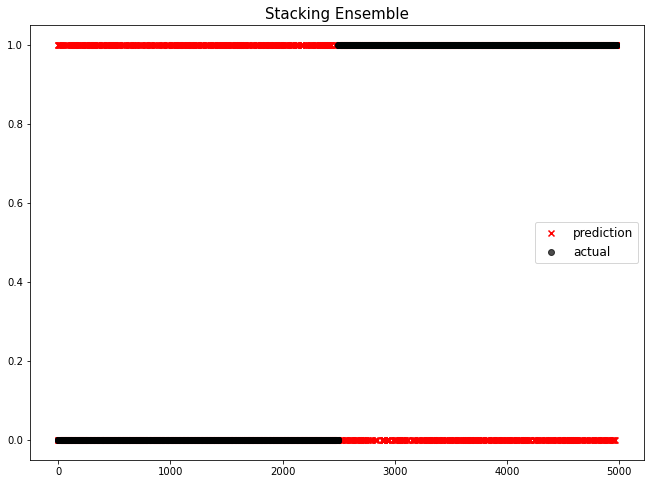

                 model        f1
0   LogisticRegression  0.848682
1               Voting  0.847900
2           Voting Std  0.847560
3    Stacking Ensemble  0.846108
4              XGBoost  0.842380
5      RidgeClassifier  0.835128
6         RandomForest  0.830872
7          Standard RF  0.830872
8     Normalization RF  0.830872
9    Poly RandomForest  0.825812
10        DecisionTree  0.825616
11      KNN Classifier  0.810463


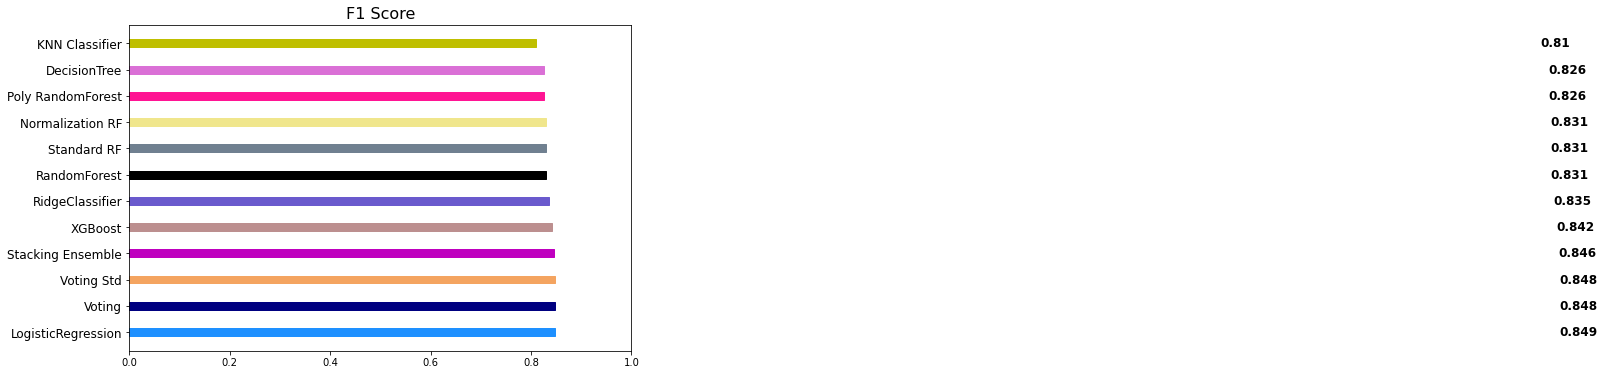

In [18]:
stack_cls = StackingClassifier(stack_models, final_estimator=xgb, n_jobs=-1)

# 샘플 데이터, 알고리즘 3개만 사용했지만 시간이 많이 걸림을 확인 가능
stack_cls.fit(X_train, y_train)
stack_pred = stack_cls.predict(X_test)
f1_eval('Stacking Ensemble', stack_pred, y_test)

#### hyperparameter 튜닝 후

In [19]:
params = {
    'n_estimators': [100, 200, 300], 
    'random_state': [0], 
    'max_depth': [7, 8, 9, 10], 
    'max_features': [0.7, 0.8, 0.9], 
    'min_samples_split': [5, 10, 20],
}

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

##### Grid Search RF

In [21]:
#cv 6 grid search
grid_search = GridSearchCV(RandomForestClassifier(), params, cv=6, n_jobs=-1, scoring='f1')
grid_search.fit(X_train,y_train)
y_pred = grid_search.predict(X_test)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.score(X_test,y_test)) #해당것 score
print(roc_auc_score(y_test,y_pred)) #roc score

{'max_depth': 7, 'max_features': 0.7, 'min_samples_split': 20, 'n_estimators': 200, 'random_state': 0}
0.8442513463032698
0.8424206111443979
0.841387128204896


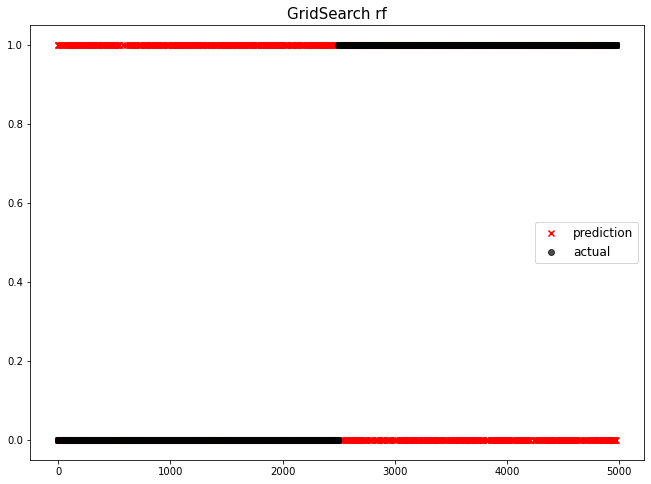

                 model        f1
0   LogisticRegression  0.848682
1               Voting  0.847900
2           Voting Std  0.847560
3    Stacking Ensemble  0.846108
4        GridSearch rf  0.842421
5              XGBoost  0.842380
6      RidgeClassifier  0.835128
7         RandomForest  0.830872
8          Standard RF  0.830872
9     Normalization RF  0.830872
10   Poly RandomForest  0.825812
11        DecisionTree  0.825616
12      KNN Classifier  0.810463


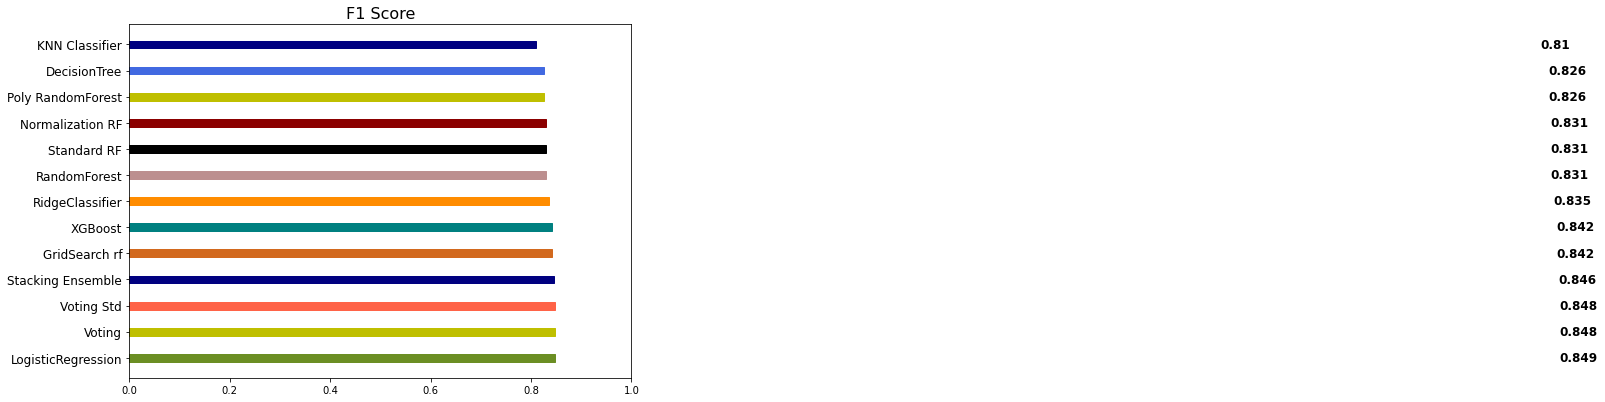

In [22]:
rf_best = RandomForestClassifier(**grid_search.best_params_)
rf_best.fit(X_train, y_train)
rf_best_pred = rf_best.predict(X_test)
f1_eval('GridSearch rf', rf_best_pred, y_test)

In [23]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=6)        # 6개로 나눈다
n_splits = 6

##### XGBclassifier grid search

In [24]:
params = {
    'n_estimators': [100, 200, 300], 
    'random_state': [0], 
    'learning_rate': [0.01, 0.1], 
    'max_depth': [5, 6, 7], 
    'subsample': [0.6, 0.7, 0.8, 0.9],
}
#cv 6 grid search
grid_search = GridSearchCV(XGBClassifier(), params, cv=6, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train,y_train)
y_pred = grid_search.predict(X_test)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.score(X_test,y_test)) #해당것 score
print(roc_auc_score(y_test,y_pred)) #roc score


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.7}
0.8480248539387922
0.8485823446611703
0.8486059685192505


##### lgbm grid search

In [25]:
from lightgbm import LGBMClassifier

{'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1500, 'random_state': 0, 'subsample': 0.7}
0.8488968595398134
0.8469736577518601
0.8469887613116354


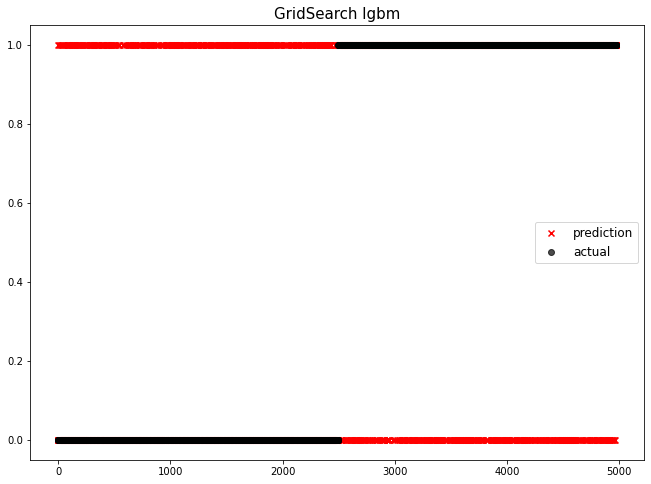

                 model        f1
0      GridSearch lgbm  0.850321
1   LogisticRegression  0.848682
2               Voting  0.847900
3           Voting Std  0.847560
4    Stacking Ensemble  0.846108
5        GridSearch rf  0.842421
6              XGBoost  0.842380
7      RidgeClassifier  0.835128
8         RandomForest  0.830872
9          Standard RF  0.830872
10    Normalization RF  0.830872
11   Poly RandomForest  0.825812
12        DecisionTree  0.825616
13      KNN Classifier  0.810463


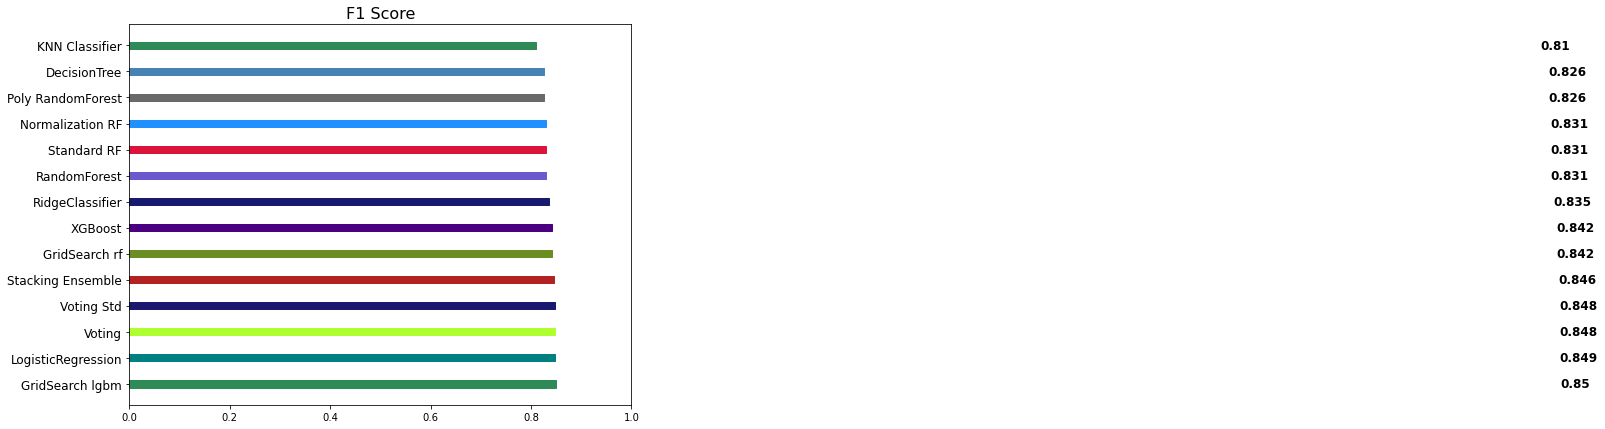

In [26]:
params = {
    'n_estimators': [1500, 2000], 
    'random_state': [0], 
    'learning_rate': [0.01], 
    'max_depth': [5, 6, 7], 
    'subsample': [0.6, 0.7],
    'colsample_bytree' : [0.8, 0.9]
}
#cv 6 grid search
grid_search = GridSearchCV(XGBClassifier(), params, cv=6, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train,y_train)
y_pred = grid_search.predict(X_test)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.score(X_test,y_test)) #해당것 score
print(roc_auc_score(y_test,y_pred)) #roc score

lgbm_best = LGBMClassifier(**grid_search.best_params_)
lgbm_best.fit(X_train, y_train)
lgbm_best_pred = lgbm_best.predict(X_test)
f1_eval('GridSearch lgbm', lgbm_best_pred, y_test)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [29]:
from lightgbm import LGBMClassifier

In [30]:
from sklearn.ensemble import VotingClassifier

In [31]:
rf_best = make_pipeline(
    # StandardScaler(),
    RandomForestClassifier(max_depth=7, max_features= 0.7, min_samples_split= 20,
 n_estimators= 200, random_state= 0),
)

In [32]:
xgb_best = make_pipeline(
    XGBClassifier(learning_rate= 0.01, max_depth= 7, n_estimators= 300,
 random_state= 0, subsample= 0.7),
)


In [33]:
lgbm_best = make_pipeline(
    StandardScaler(),
    LGBMClassifier(colsample_bytree= 0.8, learning_rate= 0.01,
 max_depth= 6, n_estimators= 1500, random_state= 0,
 subsample= 0.7),
)

In [65]:
lgbm_best = LGBMClassifier(colsample_bytree= 0.9, learning_rate= 0.01,
 max_depth= 5, n_estimators= 1500, random_state= 0,
 subsample= 0.7)

In [34]:
knn_best = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=3),
)

In [35]:
lg_best = make_pipeline(
    # StandardScaler(),
    LogisticRegression(),
)

In [36]:
Ridge_best = make_pipeline(
    # StandardScaler(),
    RidgeClassifier(alpha=3),
)

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
gd_best = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(learning_rate= 0.1, max_depth= 6, max_features= 0.9,
 n_estimators= 200, random_state= 0, subsample= 0.7),
)

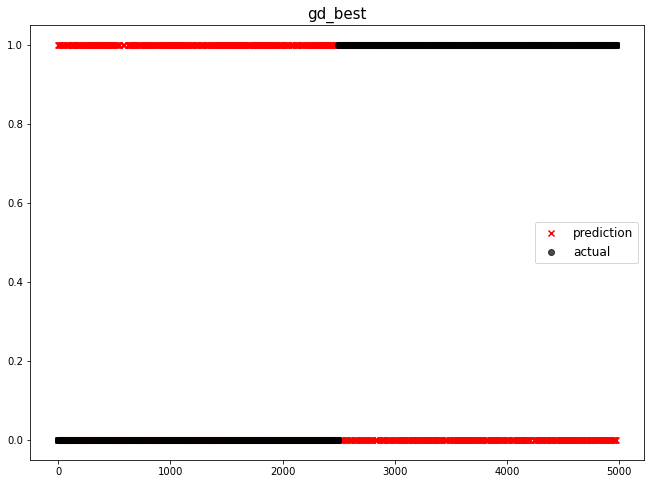

                 model        f1
0      GridSearch lgbm  0.850321
1   LogisticRegression  0.848682
2               Voting  0.847900
3           Voting Std  0.847560
4    Stacking Ensemble  0.846108
5              gd_best  0.845877
6        GridSearch rf  0.842421
7              XGBoost  0.842380
8      RidgeClassifier  0.835128
9         RandomForest  0.830872
10         Standard RF  0.830872
11    Normalization RF  0.830872
12   Poly RandomForest  0.825812
13        DecisionTree  0.825616
14      KNN Classifier  0.810463


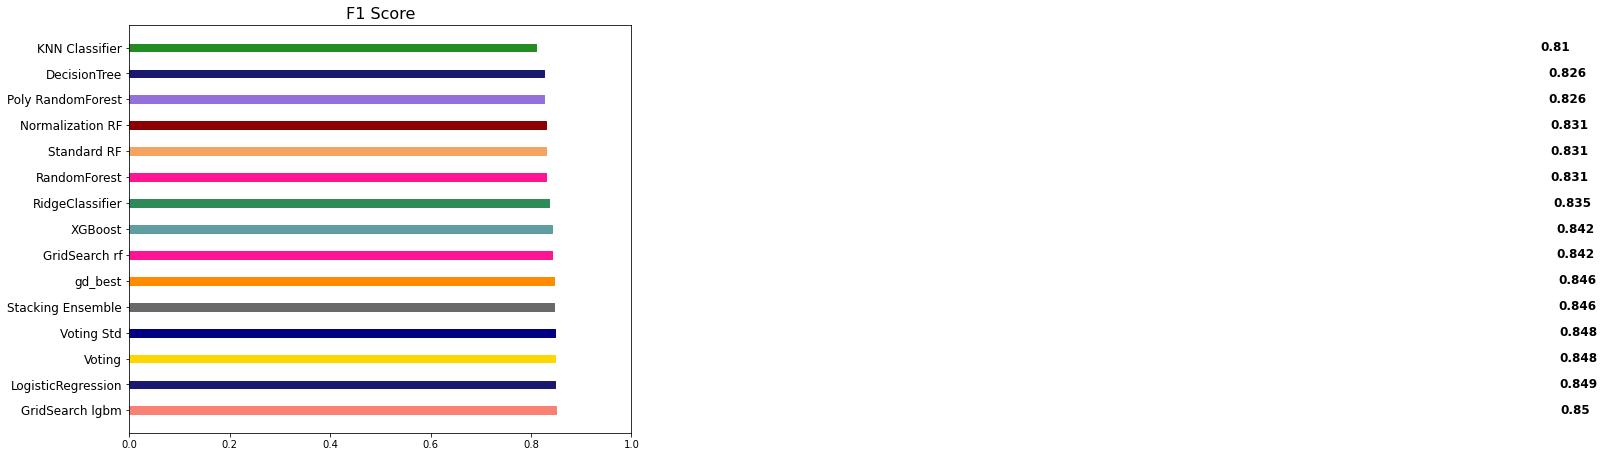

In [39]:
gd_best.fit(X_train, y_train)
gd_best_pred = gd_best.predict(X_test)
f1_eval('gd_best', gd_best_pred, y_test)

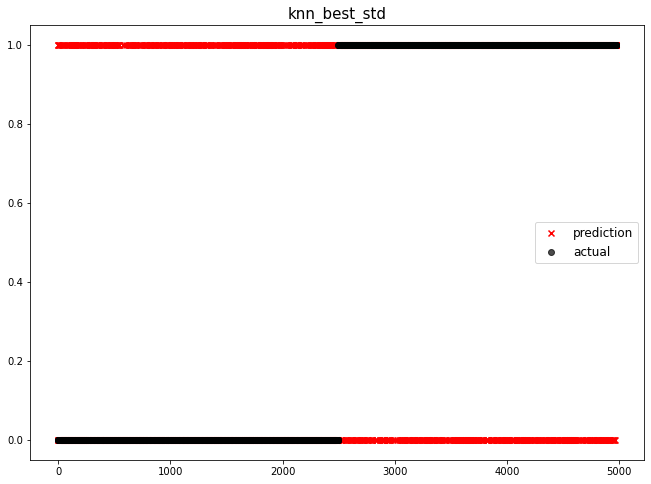

                 model        f1
0      GridSearch lgbm  0.850321
1   LogisticRegression  0.848682
2               Voting  0.847900
3           Voting Std  0.847560
4         knn_best_std  0.847560
5    Stacking Ensemble  0.846108
6              gd_best  0.845877
7        GridSearch rf  0.842421
8              XGBoost  0.842380
9      RidgeClassifier  0.835128
10        RandomForest  0.830872
11         Standard RF  0.830872
12    Normalization RF  0.830872
13   Poly RandomForest  0.825812
14        DecisionTree  0.825616
15      KNN Classifier  0.810463


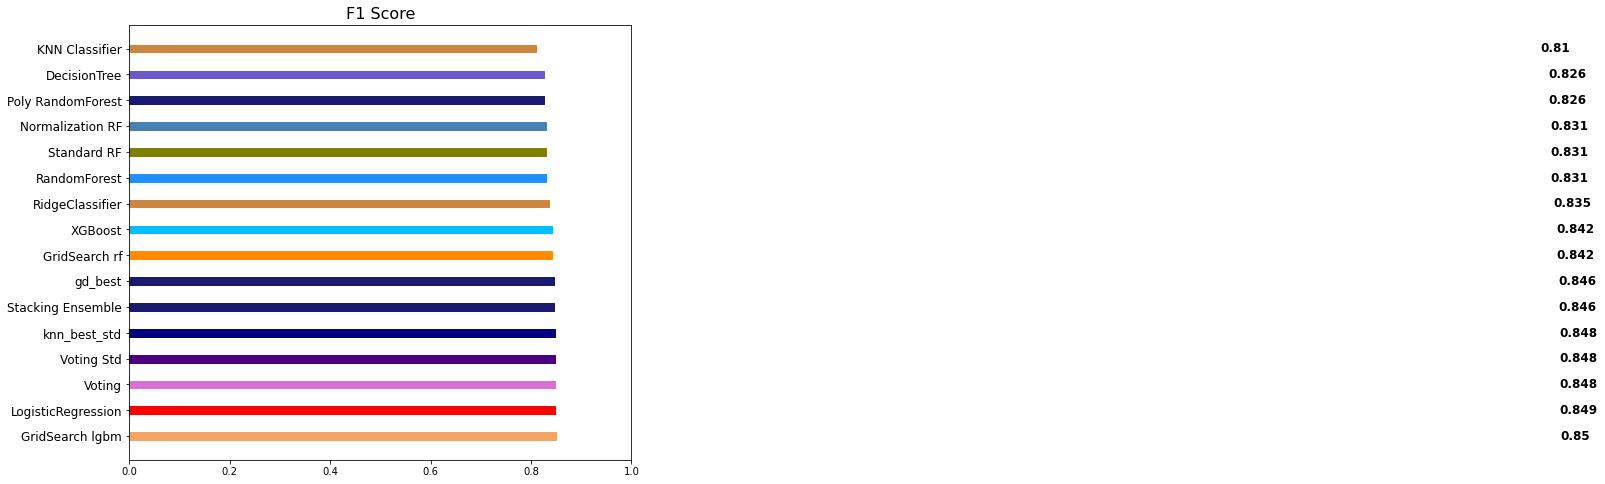

In [40]:
knn_best.fit(X_train, y_train)
knn_best_pred = knn_best.predict(X_test)
f1_eval('knn_best_std', pred, y_test)

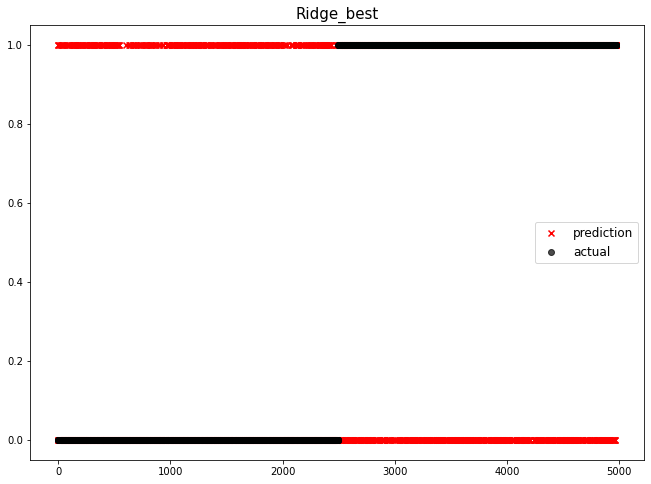

                 model        f1
0      GridSearch lgbm  0.850321
1   LogisticRegression  0.848682
2               Voting  0.847900
3           Voting Std  0.847560
4         knn_best_std  0.847560
5    Stacking Ensemble  0.846108
6              gd_best  0.845877
7        GridSearch rf  0.842421
8              XGBoost  0.842380
9      RidgeClassifier  0.835128
10          Ridge_best  0.834094
11        RandomForest  0.830872
12         Standard RF  0.830872
13    Normalization RF  0.830872
14   Poly RandomForest  0.825812
15        DecisionTree  0.825616
16      KNN Classifier  0.810463


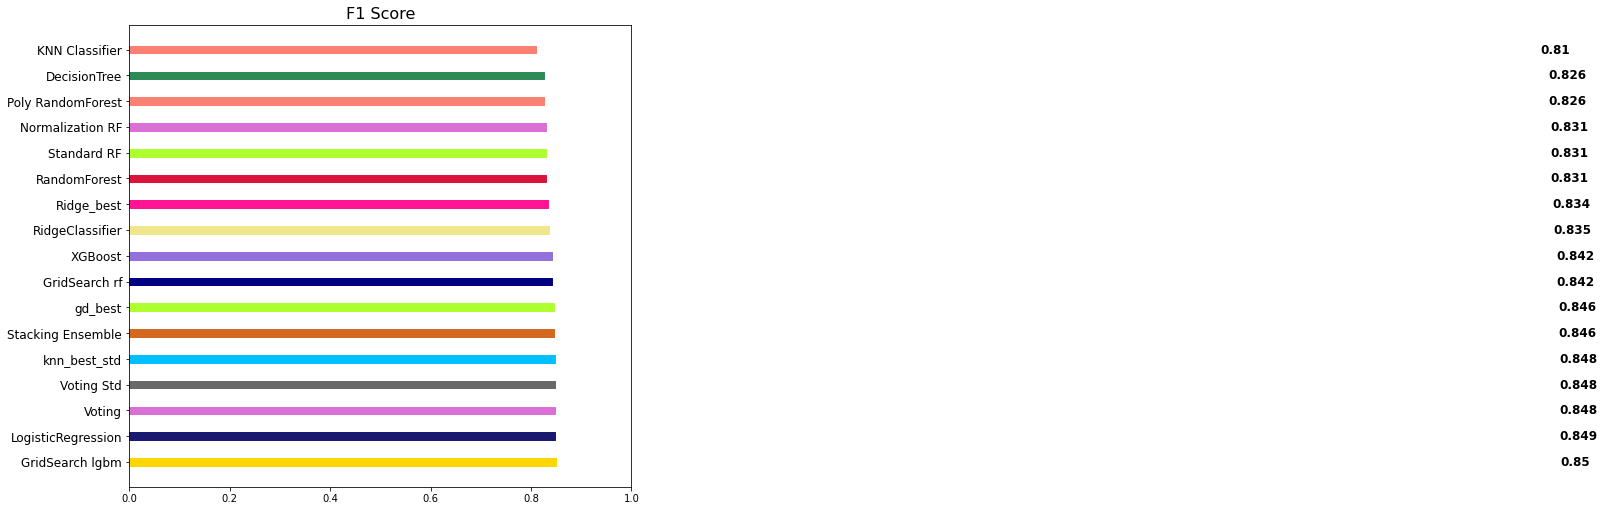

In [41]:
Ridge_best.fit(X_train, y_train)
Ridge_best_pred = Ridge_best.predict(X_test)
f1_eval('Ridge_best', Ridge_best_pred, y_test)

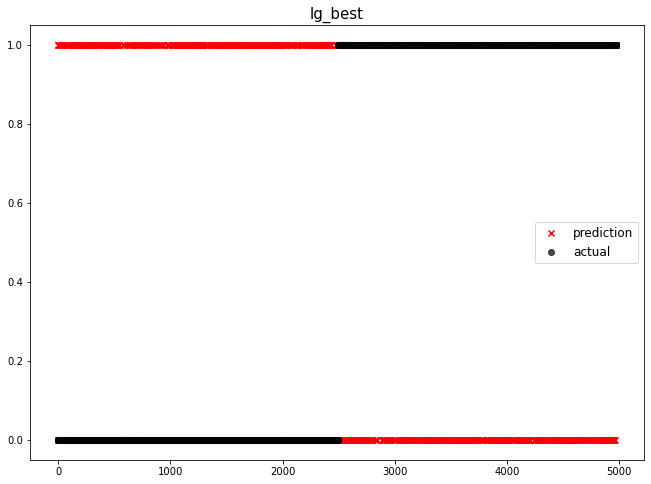

                 model        f1
0      GridSearch lgbm  0.850321
1   LogisticRegression  0.848682
2              lg_best  0.848682
3               Voting  0.847900
4           Voting Std  0.847560
5         knn_best_std  0.847560
6    Stacking Ensemble  0.846108
7              gd_best  0.845877
8        GridSearch rf  0.842421
9              XGBoost  0.842380
10     RidgeClassifier  0.835128
11          Ridge_best  0.834094
12        RandomForest  0.830872
13         Standard RF  0.830872
14    Normalization RF  0.830872
15   Poly RandomForest  0.825812
16        DecisionTree  0.825616
17      KNN Classifier  0.810463


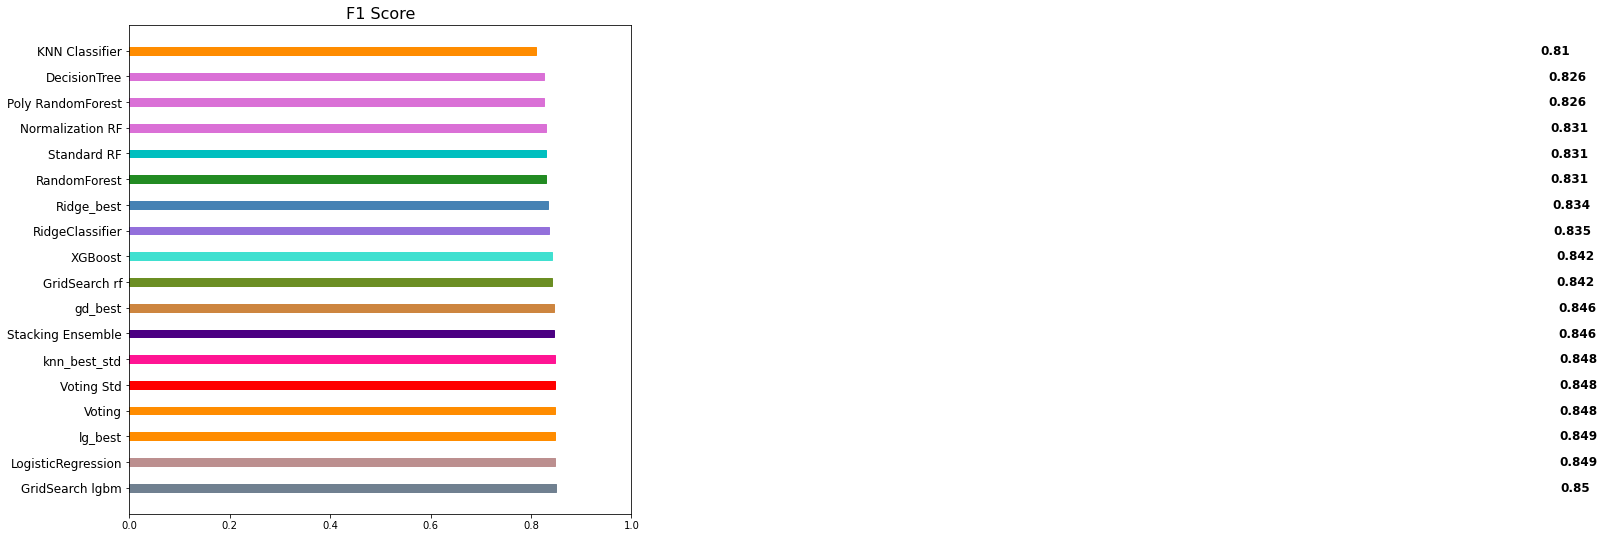

In [42]:
lg_best.fit(X_train, y_train)
lg_best_pred = lg_best.predict(X_test)
f1_eval('lg_best', lg_best_pred, y_test)

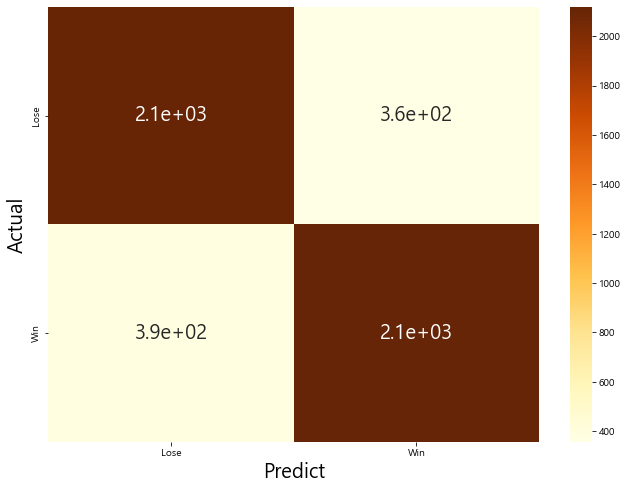

      Lose   Win
Lose  2108   357
Win    389  2119
               model        f1
0          lgbm_best  0.850321
1  Weighted Blending  0.844507


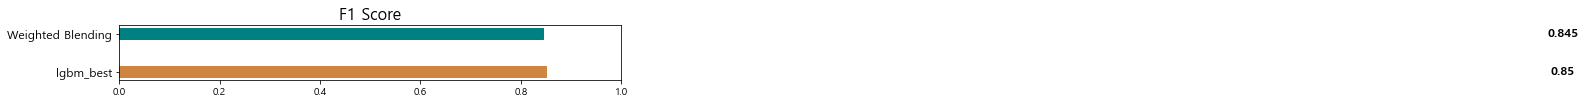

In [66]:
lgbm_best.fit(X_train, y_train)
lgbm_best_pred = lgbm_best.predict(X_test)
f1_eval('lgbm_best', lgbm_best_pred, y_test)

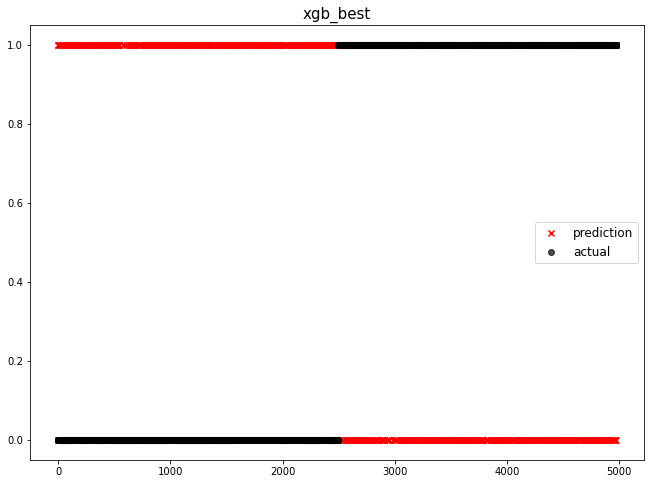

                 model        f1
0      GridSearch lgbm  0.850321
1   LogisticRegression  0.848682
2              lg_best  0.848682
3               Voting  0.847900
4           Voting Std  0.847560
5         knn_best_std  0.847560
6            lgbm_best  0.847498
7    Stacking Ensemble  0.846108
8              gd_best  0.845877
9             xgb_best  0.845212
10       GridSearch rf  0.842421
11             XGBoost  0.842380
12     RidgeClassifier  0.835128
13          Ridge_best  0.834094
14        RandomForest  0.830872
15         Standard RF  0.830872
16    Normalization RF  0.830872
17   Poly RandomForest  0.825812
18        DecisionTree  0.825616
19      KNN Classifier  0.810463


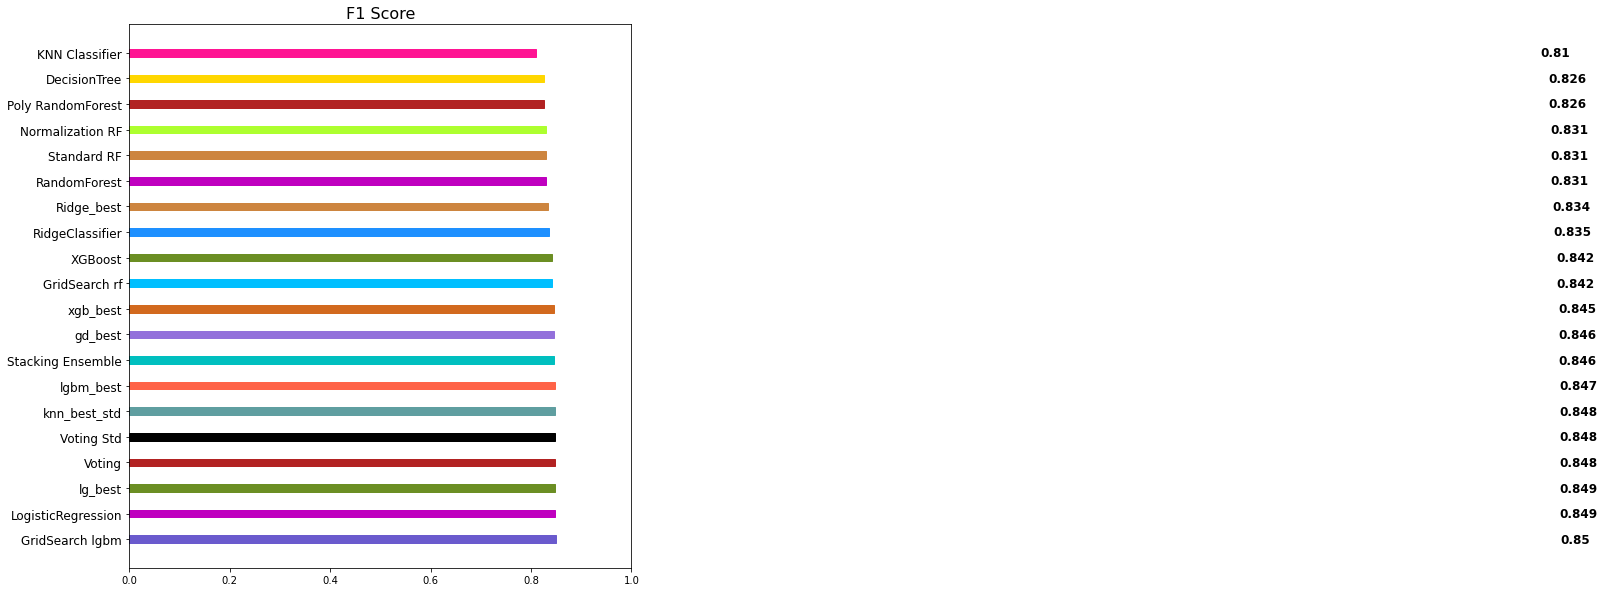

In [44]:
xgb_best.fit(X_train, y_train)
xgb_best_pred = xgb_best.predict(X_test)
f1_eval('xgb_best', xgb_best_pred, y_test)

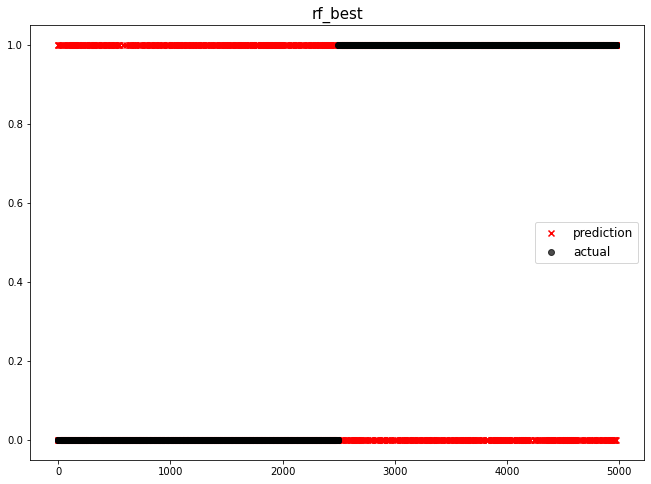

                 model        f1
0      GridSearch lgbm  0.850321
1   LogisticRegression  0.848682
2              lg_best  0.848682
3               Voting  0.847900
4           Voting Std  0.847560
5         knn_best_std  0.847560
6            lgbm_best  0.847498
7    Stacking Ensemble  0.846108
8              gd_best  0.845877
9             xgb_best  0.845212
10       GridSearch rf  0.842421
11             rf_best  0.842421
12             XGBoost  0.842380
13     RidgeClassifier  0.835128
14          Ridge_best  0.834094
15        RandomForest  0.830872
16         Standard RF  0.830872
17    Normalization RF  0.830872
18   Poly RandomForest  0.825812
19        DecisionTree  0.825616
20      KNN Classifier  0.810463


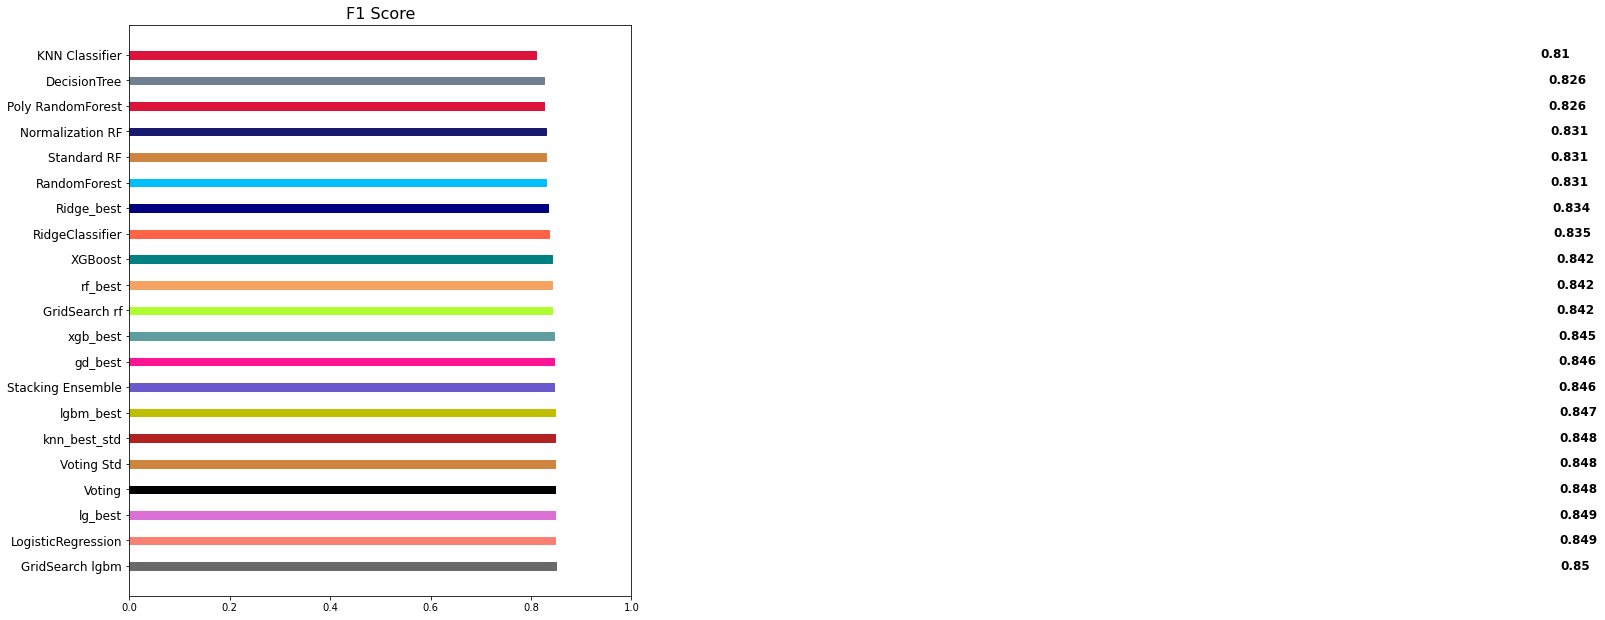

In [45]:
rf_best.fit(X_train, y_train)
rf_best_pred = rf_best.predict(X_test)
f1_eval('rf_best', rf_best_pred, y_test)

In [46]:
models = [
    # ('Logi', lg_best), 
    # ('ridge', Ridge_best),
    ('knn', knn_best),
    # ('rf', rf_best),
    ('lgbm', lgbm_best),
    ('xgb', xgb_best),
    ('gradient', gd_best)
]

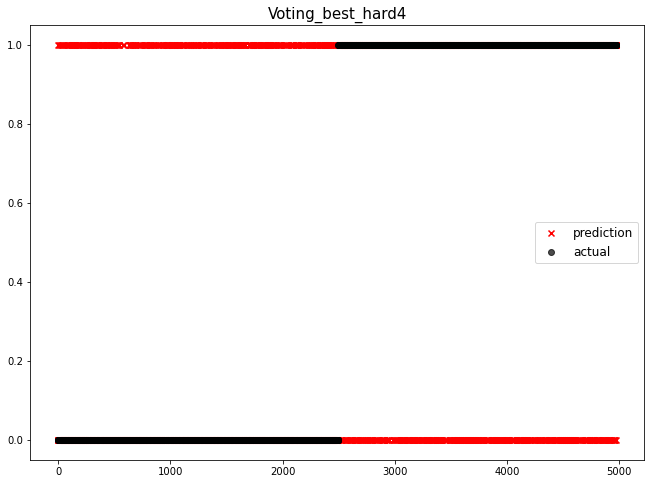

                 model        f1
0      GridSearch lgbm  0.850321
1   LogisticRegression  0.848682
2              lg_best  0.848682
3               Voting  0.847900
4           Voting Std  0.847560
5         knn_best_std  0.847560
6            lgbm_best  0.847498
7    Stacking Ensemble  0.846108
8              gd_best  0.845877
9             xgb_best  0.845212
10   Voting_best_hard4  0.844336
11       GridSearch rf  0.842421
12             rf_best  0.842421
13             XGBoost  0.842380
14     RidgeClassifier  0.835128
15          Ridge_best  0.834094
16        RandomForest  0.830872
17         Standard RF  0.830872
18    Normalization RF  0.830872
19   Poly RandomForest  0.825812
20        DecisionTree  0.825616
21      KNN Classifier  0.810463


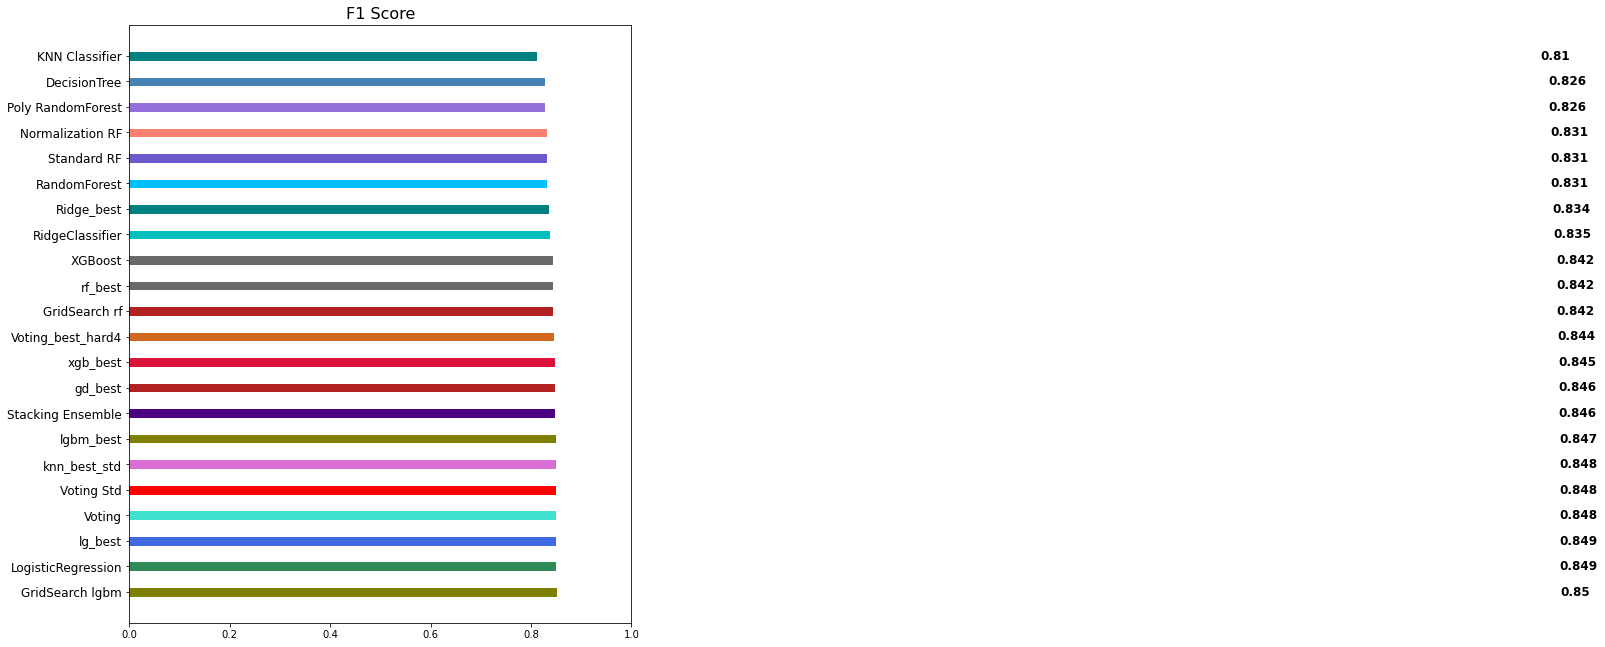

In [47]:
vc = VotingClassifier(models, voting='hard', n_jobs=-1)
vc.fit(X_train, y_train)
pred = vc.predict(X_test)
f1_eval('Voting_best_hard4', pred, y_test)

### **Stacking 결과**

In [48]:
from sklearn.ensemble import StackingClassifier

stack_models = [
    ('lgbm_std', lgbm_best), 
    ('knn_std', knn_best),
    # ('rf_bset', rf_best),
    ('Ridge', Ridge_best)
]

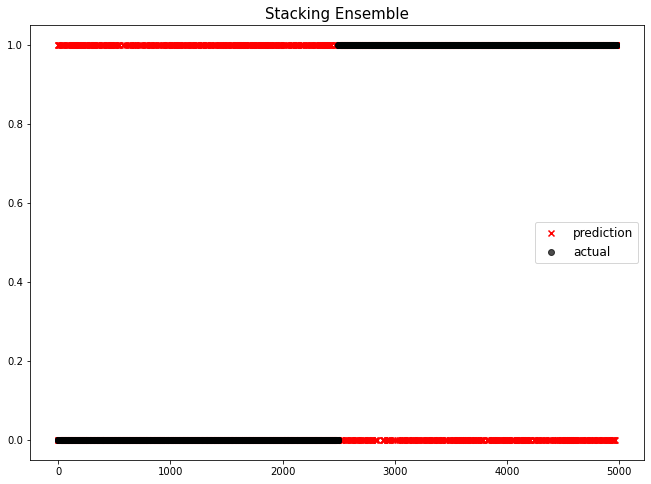

                 model        f1
0    Stacking Ensemble  0.851430
1      GridSearch lgbm  0.850321
2   LogisticRegression  0.848682
3              lg_best  0.848682
4               Voting  0.847900
5           Voting Std  0.847560
6         knn_best_std  0.847560
7            lgbm_best  0.847498
8              gd_best  0.845877
9             xgb_best  0.845212
10   Voting_best_hard4  0.844336
11       GridSearch rf  0.842421
12             rf_best  0.842421
13             XGBoost  0.842380
14     RidgeClassifier  0.835128
15          Ridge_best  0.834094
16        RandomForest  0.830872
17         Standard RF  0.830872
18    Normalization RF  0.830872
19   Poly RandomForest  0.825812
20        DecisionTree  0.825616
21      KNN Classifier  0.810463


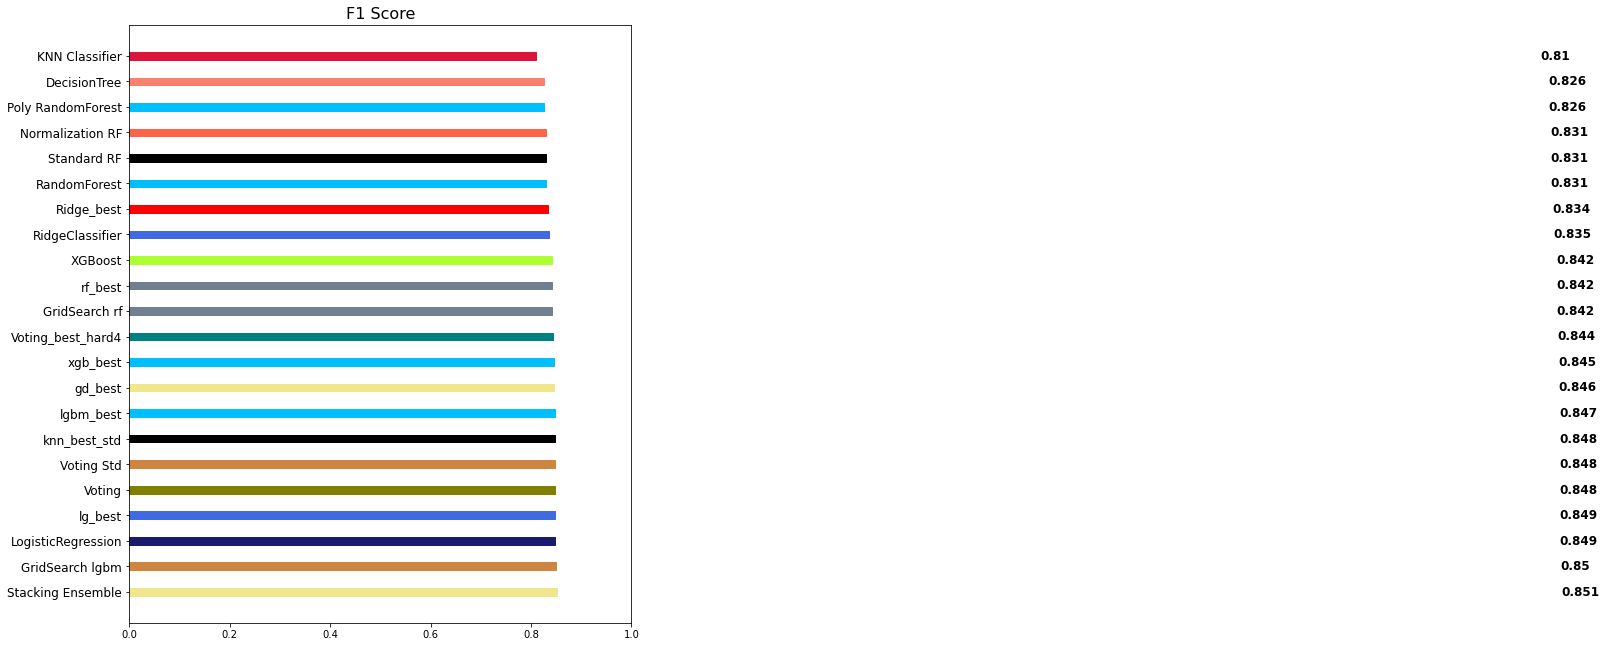

In [49]:
stack_cls = StackingClassifier(stack_models, final_estimator=xgb_best, n_jobs=-1)

# 알고리즘 3개만 사용
stack_cls.fit(X_train, y_train)
stack_pred = stack_cls.predict(X_test)
f1_eval('Stacking Ensemble', stack_pred, y_test)

In [50]:
final_outputs = {
    'xgb_best': xgb_best_pred, 
    'lgbm_std': lgbm_best_pred, 
    'knn_std': knn_best_pred,
    'rf_best': rf_best_pred, 
    'Ridge': Ridge_best_pred,
    'gdb': gd_best_pred,
}

In [51]:
final_prediction=\
final_outputs['Ridge'] * 0.1\
+final_outputs['knn_std'] * 0.2\
+final_outputs['lgbm_std'] * 0.2\
+final_outputs['xgb_best'] * 0.25\
+final_outputs['rf_best'] * 0.15\
+final_outputs['gdb'] * 0.1

In [52]:
# Confusion Matrix로 보여주기
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from IPython.display import Image

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    
plt.show
()

def plot_confusionmatrix(name_, actual,pred):
    cm = confusion_matrix(actual, pred)
    cm = pd.DataFrame(cm, columns=['Lose','Win'], index=['Lose','Win'])# columns=['Lose','Win'], index=['Lose','Win']
    plt.figure(figsize=(11,8))
    sns.heatmap(cm, annot=True, annot_kws={'size':20}, cmap='YlOrBr')
    plt.xlabel('Predict', fontsize=20)
    plt.ylabel('Actual', fontsize=20)
    
    plt.show()
    print(cm)

def f1_eval(name_, pred, actual):

    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual
    plot_confusionmatrix(name_, pred, actual)
#    plot_predictions(name_, pred, actual)

    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2



    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    
plt.show
()
    
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    
plt.show
() 

()

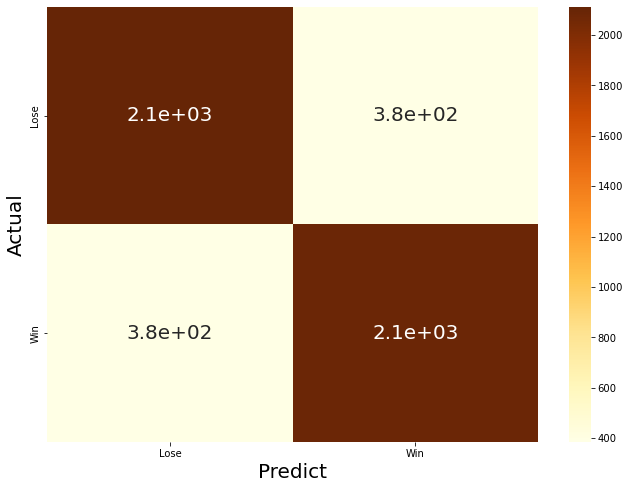

      Lose   Win
Lose  2112   385
Win    385  2091
               model        f1
0  Weighted Blending  0.844507


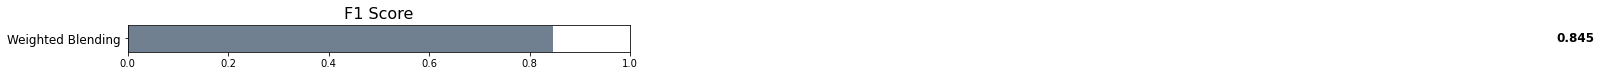

In [53]:
# Weighted Blending score
f1_eval('Weighted Blending', (final_prediction>0.5)+0, y_test)

In [54]:
import shap
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


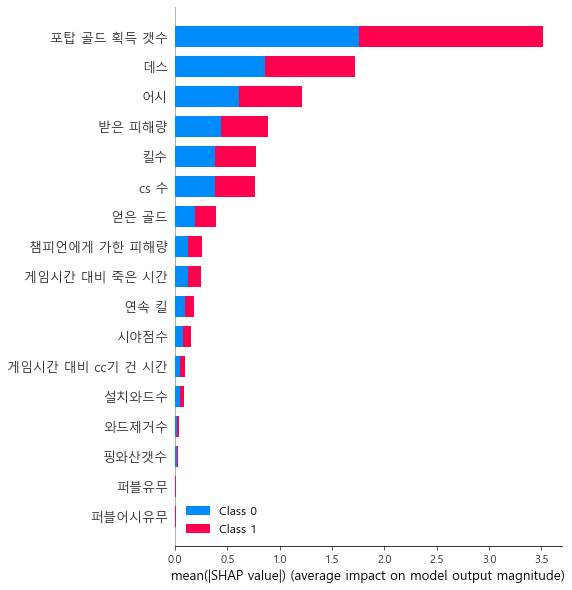

In [69]:
shap.initjs()
explainer = shap.TreeExplainer(lgbm_best)
#explainer = shap.TreeExplainer(knn_best)
shap_values = explainer.shap_values(X_test)
fig = shap.summary_plot(shap_values, X_test)
#plt.savefig(f'{data}/shap.png', dpi=300, bbox_inches="tight")

In [67]:
feature_importance = pd.DataFrame(lgbm_best.feature_importances_.reshape((1, -1)), columns=X_train.columns, index=['feature_importance'])
feature_importance.T.columns

Index(['feature_importance'], dtype='object')

In [68]:
feature_importance.T.sort_values('feature_importance',ascending=False)

,feature_importance
받은 피해량,4444
cs 수,4353
어시,3892
킬수,3057
챔피언에게 가한 피해량,3010
얻은 골드,3001
포탑 골드 획득 갯수,2793
데스,2788
시야점수,1993
게임시간 대비 죽은 시간,1769
